In [2]:
from matplotlib.image import imread; import matplotlib.pyplot as plt
import numpy as np
from random import randint 

(512, 512, 3)


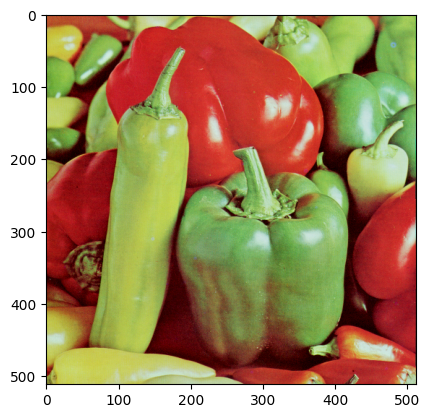

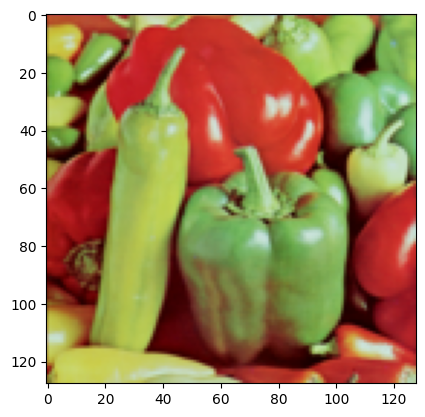

In [3]:
large_img = '../data/peppers-large.tiff'
small_img = '../data/peppers-small.tiff'
A = imread(large_img)
B = imread(small_img)
plt.imshow(A)
print(np.shape(A))
plt.figure()
plt.imshow(B)

In [4]:
def get_clusters(k,img,max_iter=5):
    centroids = []
    while np.shape(centroids)[0] < k:
        x = randint(0,511)
        y = randint(0,511)
        if (tuple(A[x][y]) in centroids):
            continue
        else:
            centroids.append(tuple(A[x][y]))
    centroids = np.array(centroids, dtype=np.float64) 

    print(np.shape(centroids))

    for iter in range(max_iter):
        print(f'completed {iter} iterations')
        # centroids mapping for each pixel
        centroids_pixels = [[] for _ in range(len(centroids))]

        # iterate over the pixels of the image
        for x in range(np.shape(img)[0]):
            for y in range(np.shape(img)[1]):
                ind = np.argmin(np.sum((centroids-img[x][y][:3])**2,axis=1))
                centroids_pixels[ind].append(img[x][y][:3])

        for ind,c in enumerate(centroids_pixels):
            if len(c)>0:
                centroids[ind] = np.mean(c, axis=0)
    
    return centroids

def compress_image(orig_img,max_iter,k):
    centroids = get_clusters(k=k,img=orig_img,max_iter=max_iter)
    compressed_image = np.copy(orig_img)
    for x in range(np.shape(orig_img)[0]):
            for y in range(np.shape(orig_img)[1]):
                ind = np.argmin(np.sum((centroids-orig_img[x][y][:3])**2,axis=1))
                compressed_image[x][y] = centroids[ind] 
    return compressed_image

            
compressed_image_10 = compress_image(orig_img=A,max_iter=30,k=5)

compressed_image_16 = compress_image(orig_img=A,max_iter=30,k=5)


(5, 3)
completed 0 iterations
completed 1 iterations
completed 2 iterations
completed 3 iterations
completed 4 iterations
completed 5 iterations
completed 6 iterations
completed 7 iterations
completed 8 iterations
completed 9 iterations
completed 10 iterations
completed 11 iterations
completed 12 iterations
completed 13 iterations
completed 14 iterations
completed 15 iterations
completed 16 iterations
completed 17 iterations
completed 18 iterations
completed 19 iterations
completed 20 iterations
completed 21 iterations
completed 22 iterations
completed 23 iterations
completed 24 iterations
completed 25 iterations
completed 26 iterations
completed 27 iterations
completed 28 iterations
completed 29 iterations
(5, 3)
completed 0 iterations
completed 1 iterations
completed 2 iterations
completed 3 iterations
completed 4 iterations
completed 5 iterations
completed 6 iterations
completed 7 iterations
completed 8 iterations
completed 9 iterations
completed 10 iterations
completed 11 iteration

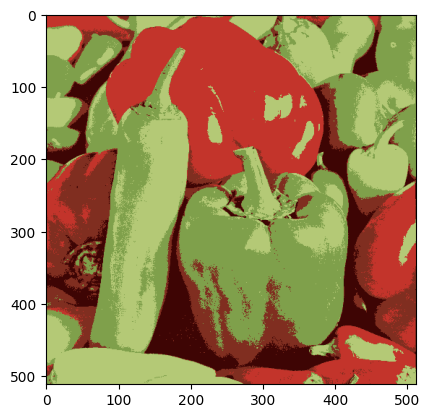

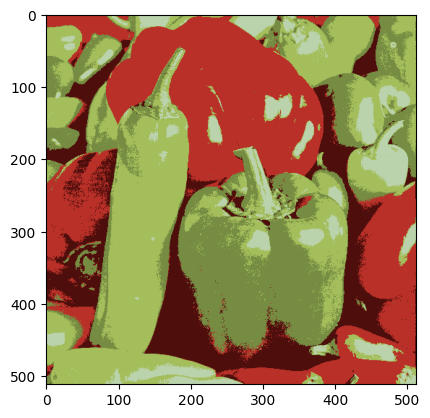

In [5]:
plt.figure()
plt.imshow(compressed_image_10)
plt.figure()
plt.imshow(compressed_image_16)

### b) 
We represent the image with 16 pixels. Each pixel can be represented by 4 bits and 8 * 3 * 16 to represent the RGB values of the 16 pixels.

In total : ( 512 * 512 * 4 ) + ( 8 * 3 * 16 ) = 1 048 960 bits. 

Previous nb of bits : 512 * 512 * 24 = 6 291 456

Compression faction : 6 291 456 / 1 048 960 ~ 6